In [ ]:
#DATASETS:  https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities
#DATASET DESCRIPTION: https://zenodo.org/records/4446043#.ZEV8d-zMI-R

In [1]:
#Let's start by importing all packages needed.
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
import seaborn as sns
from sklearn import preprocessing
import numpy as np
import time


from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree, export_text


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.stats import uniform, poisson

from sklearn.metrics import confusion_matrix, \
                            accuracy_score, \
                            precision_score, \
                            recall_score, \
                            f1_score, \
                            fbeta_score, \
                            mean_squared_error, \
                            mean_absolute_error, \
                            roc_auc_score, \
                            roc_curve, \
                            classification_report


In [2]:
#Set graph styling
custom_palette = ["#0078D4", "#FFA500", "#00B294", "#7A7574", "#F7630C"]
power_bi_style = {
    'axes.labelsize': 12,
    'axes.titlesize': 16,
    'legend.fontsize': 12,
    'legend.frameon': False,
    'legend.loc': 'upper right',
    'axes.grid': False,
    'grid.color': 'lightgray',
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.facecolor': 'white',
}

# Apply the custom style
plt.style.use(power_bi_style)


In [3]:
#Load the datasets.
cities = ["Amsterdam","Athens","Barcelona","Berlin","Budapest","Lisbon","London","Paris","Rome","Vienna"]
df_am1 = pd.read_csv('~/Downloads/DAA/archive/amsterdam_weekdays.csv')
df_am2 = pd.read_csv('~/Downloads/DAA/archive/amsterdam_weekends.csv')

df_at1 = pd.read_csv('~/Downloads/DAA/archive/athens_weekdays.csv')
df_at2 = pd.read_csv('~/Downloads/DAA/archive/athens_weekends.csv')

df_ba1 = pd.read_csv('~/Downloads/DAA/archive/barcelona_weekdays.csv')
df_ba2 = pd.read_csv('~/Downloads/DAA/archive/barcelona_weekends.csv')

df_be1 = pd.read_csv('~/Downloads/DAA/archive/berlin_weekdays.csv')
df_be2 = pd.read_csv('~/Downloads/DAA/archive/berlin_weekends.csv')

df_bu1 = pd.read_csv('~/Downloads/DAA/archive/budapest_weekdays.csv')
df_bu2 = pd.read_csv('~/Downloads/DAA/archive/budapest_weekends.csv')

df_li1 = pd.read_csv('~/Downloads/DAA/archive/lisbon_weekdays.csv')
df_li2 = pd.read_csv('~/Downloads/DAA/archive/lisbon_weekends.csv')

df_lo1 = pd.read_csv('~/Downloads/DAA/archive/london_weekdays.csv')
df_lo2 = pd.read_csv('~/Downloads/DAA/archive/london_weekends.csv')

df_pa1 = pd.read_csv('~/Downloads/DAA/archive/paris_weekdays.csv')
df_pa2 = pd.read_csv('~/Downloads/DAA/archive/paris_weekends.csv')

df_ro1 = pd.read_csv('~/Downloads/DAA/archive/rome_weekdays.csv')
df_ro2 = pd.read_csv('~/Downloads/DAA/archive/rome_weekends.csv')

df_vi1 = pd.read_csv('~/Downloads/DAA/archive/vienna_weekdays.csv')
df_vi2 = pd.read_csv('~/Downloads/DAA/archive/vienna_weekends.csv')

In [4]:
# -------------------------------------------------------------------------
#The following section will be the data processing of the several cities.

In [5]:
df_am1["dataType"] = "Weekday"
df_am2["dataType"] = "Weekend"

df_at1["dataType"] = "Weekday"
df_at2["dataType"] = "Weekend"

df_ba1["dataType"] = "Weekday"
df_ba2["dataType"] = "Weekend"

df_be1["dataType"] = "Weekday"
df_be2["dataType"] = "Weekend"

df_bu1["dataType"] = "Weekday"
df_bu2["dataType"] = "Weekend"

df_li1["dataType"] = "Weekday"
df_li2["dataType"] = "Weekend"

df_lo1["dataType"] = "Weekday"
df_lo2["dataType"] = "Weekend"

df_pa1["dataType"] = "Weekday"
df_pa2["dataType"] = "Weekend"

df_ro1["dataType"] = "Weekday"
df_ro2["dataType"] = "Weekend"

df_vi1["dataType"] = "Weekday"
df_vi2["dataType"] = "Weekend"

In [6]:
#Append the datasets.
df_am = df_am1._append(df_am2,ignore_index=True)
df_at = df_at1._append(df_at2,ignore_index=True)
df_ba = df_ba1._append(df_ba2,ignore_index=True)
df_be = df_be1._append(df_be2,ignore_index=True)
df_bu = df_bu1._append(df_bu2,ignore_index=True)
df_li = df_li1._append(df_li2,ignore_index=True)
df_lo = df_lo1._append(df_lo2,ignore_index=True)
df_pa = df_pa1._append(df_pa2,ignore_index=True)
df_ro = df_ro1._append(df_ro2,ignore_index=True)
df_vi = df_vi1._append(df_vi2,ignore_index=True)

In [7]:
#df_am['dist'] = df_am['dist'].round(decimals = 3) #1
#df_am['metro_dist'] = df_am['metro_dist'].round(decimals = 3)

#df_at['dist'] = df_at['dist'].round(decimals = 3)
#df_at['metro_dist'] = df_at['metro_dist'].round(decimals = 3)

#df_ba['dist'] = df_ba['dist'].round(decimals = 3)
#df_ba['metro_dist'] = df_ba['metro_dist'].round(decimals = 3)

#df_be['dist'] = df_be['dist'].round(decimals = 3)
#df_be['metro_dist'] = df_be['metro_dist'].round(decimals = 3)

#df_bu['dist'] = df_bu['dist'].round(decimals = 3)
#df_bu['metro_dist'] = df_bu['metro_dist'].round(decimals = 3)

#df_li['dist'] = df_li['dist'].round(decimals = 3)
#df_li['metro_dist'] = df_li['metro_dist'].round(decimals = 3)

#df_lo['dist'] = df_lo['dist'].round(decimals = 3)
#df_lo['metro_dist'] = df_lo['metro_dist'].round(decimals = 3)

#df_pa['dist'] = df_pa['dist'].round(decimals = 3)
#df_pa['metro_dist'] = df_pa['metro_dist'].round(decimals = 3)

#df_ro['dist'] = df_ro['dist'].round(decimals = 3) #0
#df_ro['metro_dist'] = df_ro['metro_dist'].round(decimals = 3)

#df_vi['dist'] = df_vi['dist'].round(decimals = 3)
#df_vi['metro_dist'] = df_vi['metro_dist'].round(decimals = 3)

In [8]:
df_am["city"] = "Amsterdam"
df_at["city"] = "Athens"
df_ba["city"] = "Barcelona"
df_be["city"] = "Berlin"
df_bu["city"] = "Budapest"
df_li["city"] = "Lisbon"
df_lo["city"] = "London"
df_pa["city"] = "Paris"
df_ro["city"] = "Rome"
df_vi["city"] = "Vienna"

In [9]:
#Append all data into a final global dataset
df = df_am._append(df_at,ignore_index=True)
df = df._append(df_ba,ignore_index=True)
df = df._append(df_ba,ignore_index=True)
df = df._append(df_be,ignore_index=True)
df = df._append(df_bu,ignore_index=True)
df = df._append(df_li,ignore_index=True)
df = df._append(df_lo,ignore_index=True)
df = df._append(df_pa,ignore_index=True)
df = df._append(df_ro,ignore_index=True)
df = df._append(df_vi,ignore_index=True)

In [10]:
#Checking if there occured any null values originated from the append
df.isna().any()

Unnamed: 0                    False
realSum                       False
room_type                     False
room_shared                   False
room_private                  False
person_capacity               False
host_is_superhost             False
multi                         False
biz                           False
cleanliness_rating            False
guest_satisfaction_overall    False
bedrooms                      False
dist                          False
metro_dist                    False
attr_index                    False
attr_index_norm               False
rest_index                    False
rest_index_norm               False
lng                           False
lat                           False
dataType                      False
city                          False
dtype: bool

In [11]:
#That column 'Unnamed: 0' is completely unnecessary, as it appears to be a previous index of rows of the datasets.
#Right now, it is simply a hindrance - we must exclude it from our data.
df = df.drop(['Unnamed: 0'], axis=1)
print(df.columns)

Index(['realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'dataType', 'city'],
      dtype='object')


In [12]:
#Ok, let's just check if the dataType column is categorical (since it is important for later).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54540 entries, 0 to 54539
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     54540 non-null  float64
 1   room_type                   54540 non-null  object 
 2   room_shared                 54540 non-null  bool   
 3   room_private                54540 non-null  bool   
 4   person_capacity             54540 non-null  float64
 5   host_is_superhost           54540 non-null  bool   
 6   multi                       54540 non-null  int64  
 7   biz                         54540 non-null  int64  
 8   cleanliness_rating          54540 non-null  float64
 9   guest_satisfaction_overall  54540 non-null  float64
 10  bedrooms                    54540 non-null  int64  
 11  dist                        54540 non-null  float64
 12  metro_dist                  54540 non-null  float64
 13  attr_index                  545

In [13]:
#We might as well convert room_type to categorical as well, since it can be important
df["dataType"] = df["dataType"].astype("category")
df["room_type"] = df["room_type"].astype("category")
df["city"] = df["city"].astype("category")

In [14]:
df.tail()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,dataType,city
54535,715.938574,Entire home/apt,False,False,6.0,False,0,1,10.0,100.0,...,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,Weekend,Vienna
54536,304.793960,Entire home/apt,False,False,2.0,False,0,0,8.0,86.0,...,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,Weekend,Vienna
54537,637.168969,Entire home/apt,False,False,2.0,False,0,0,10.0,93.0,...,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,Weekend,Vienna
54538,301.054157,Private room,False,True,2.0,False,0,0,10.0,87.0,...,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,Weekend,Vienna
54539,133.230489,Private room,False,True,4.0,True,1,0,10.0,93.0,...,1.263932,0.480903,150.450381,10.774264,225.247293,5.444140,16.39066,48.20811,Weekend,Vienna


In [15]:
#Sava the clean dataset
#df_save = df.to_csv('~/Downloads/DAA/archive/clean_global_dataset.csv')

<Axes: >

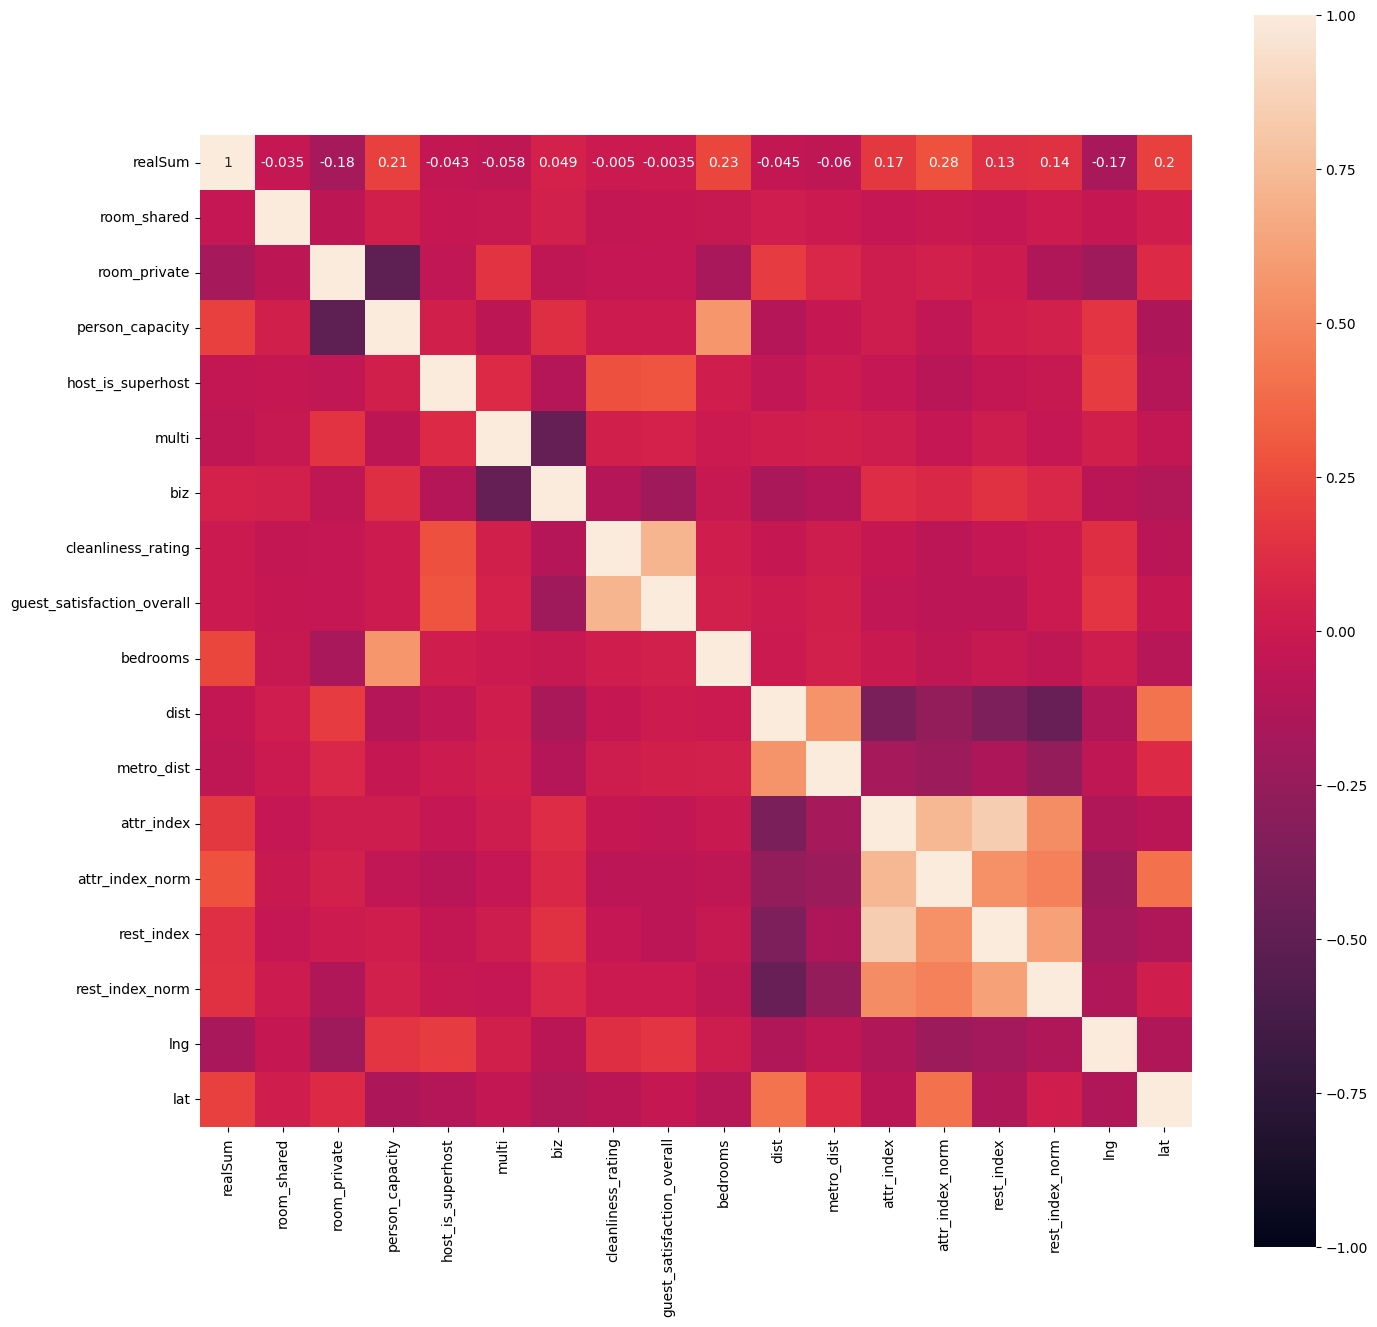

In [18]:
# -------------------------------------------------------------------------
#We start our data analysis by doing a general multivariate analysis just to quickly oversee some info
corr_matrix = df.corr(numeric_only=True)
f,ax = plt.subplots(figsize=(16,16))
sns.heatmap(corr_matrix, vmin=-1,vmax=1, square=True, annot=True)

In [ ]:
#As we can see from the correlation matrix (and as earlier predicted), the 'attr_index' and 'attr_index_norm' seem
#to be giving redundant data. The same goes for 'rest_index' and 'rest_index_norm'.
#Since this is the case, we will simply drop the normalized versions, since we cannot verify the calculations made,
#and we'd rather work with raw data

#df = df.drop(['attr_index_norm'], axis=1)
#df = df.drop(['rest_index_norm'], axis=1)

In [ ]:
#Extra info -
count_wd = len(df[df["dataType"]=="Weekday"])
count_we = len(df[df["dataType"]=="Weekend"])
count = count_wd + count_we
perc1 = (100*count_we)/count
perc2 = (100*count_wd)/count

Amsterdam_l = len(df[df["city"]=="Amsterdam"])
Athens_l = len(df[df["city"]=="Athens"])
Barcelona_l = len(df[df["city"]=="Barcelona"])
Berlin_l = len(df[df["city"]=="Berlin"])
Budapest_l = len(df[df["city"]=="Budapest"])
Lisbon_l = len(df[df["city"]=="Lisbon"])
London_l = len(df[df["city"]=="London"])
Paris_l = len(df[df["city"]=="Paris"])
Rome_l = len(df[df["city"]=="Rome"])
Vienna_l = len(df[df["city"]=="Vienna"])

globalC = len(df)

#Some important data must be known
print("~~~ DATA AMOUNT ~~~")
print("Rows of data categorized as weekend data: " +str(count_we))
print("Rows of data categorized as weekday data: " +str(count_wd))
print("Overall " + str(perc1) + "% of weekend data and " + str(perc2) + "% of weekday data")

print("\n")
print("Rows of data categorized as Amsterdam data: " + str(Amsterdam_l))
print("Rows of data categorized as Athens data: " +str(Athens_l))
print("Rows of data categorized as Barcelona data: " +str(Barcelona_l))
print("Rows of data categorized as Berlin data: " + str(Berlin_l))
print("Rows of data categorized as Budapest data: " +str(Budapest_l))
print("Rows of data categorized as Lisbon data: " +str(Lisbon_l))
print("Rows of data categorized as London data: " + str(London_l))
print("Rows of data categorized as Paris data: " +str(Paris_l))
print("Rows of data categorized as Rome data: " +str(Rome_l))
print("Rows of data categorized as Vienna data: " +str(Vienna_l))


print("\n")
print("Total rows of data: " +str(globalC))

print("~~~~~~~~~~~~~~~~~~~")

In [ ]:
# -------------------------------------------------------------------------
#Analysis of cleanliness_rating

def plot_city_count(city):
    cityData = df[df["city"] == city]
    sns.countplot(data=cityData, x="cleanliness_rating")
    plt.show()

# Create an interactive selection widget with a dropdown list of cities
city_selector = widgets.Dropdown(
    options=cities,
    description="Select City",
    disabled=False,
)

# Use the 'interact' function to dynamically update the plot based on the selected city
interact(plot_city_count, city=city_selector)

plt.show()


In [ ]:
def plot_city_kde(city):
    cityData = df[df["city"] == city]
    sns.kdeplot(data=cityData, x="cleanliness_rating")
    plt.show()

# Use the 'interact' function to dynamically update the plot based on the selected city
interact(plot_city_kde, city=city_selector)

plt.show()

In [ ]:
# -------------------------------------------------------------------------
# Machine Learning

In [ ]:
#Applying unsupervised k-means on global values of distance to metro by distance to city center
# we start by preparing the data

In [ ]:
X = df['dist']
y = df['realSum']

#pca = PCA(2)
#data2 = pca.fit_transform(data)
#print(data2)

In [ ]:
plt.scatter(X, y)
plt.show()

In [ ]:
# to find out a good number of clusters, we apply the elbow technique
data = list(zip(X, y))
inertias = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init = 'auto')
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
    

plt.plot(range(1,11), inertias, marker='o')
plt.title('K.means')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show() 

In [ ]:
#there doesn't seem to be a "good" amount of clusters

In [ ]:
kmeans = KMeans (n_clusters = 3, n_init = 10, random_state = 2022)
kmeans.fit(data)

In [ ]:
kmeans.cluster_centers_

In [ ]:
kmeans.labels_

In [ ]:
plt.scatter(X, y, c = kmeans.labels_, cmap = 'rainbow')

plt.xlabel("dist")
plt.ylabel("metro_dist")

In [ ]:
print(X)
#Xf = kmeans.fit_transform(X)

In [ ]:
#### Neural Network
newdf.info()

In [ ]:
newdf = df
#newdf = df.drop('dataType', 'city', 'room_type')
newdf['dataType'] = pd.factorize(newdf['dataType'], sort=True)[0] + 1
newdf['city'] = pd.factorize(newdf['city'], sort=True)[0] + 1
newdf['room_type'] = pd.factorize(newdf['room_type'], sort=True)[0] + 1

In [ ]:
newdf.tail()

In [ ]:
x = newdf.drop('realSum', axis = 1)
y = newdf[['realSum']]

In [ ]:
xtr, xt, ytr, yt = train_test_split(x, y, test_size = 0.2, random_state= 2021)

In [19]:
# -------------------------------------------------------------------------







### Problem: How can we predict overall guest satisfaction?

In [20]:
#How much is overall guest satisfaction influenced by the other variables?

In [21]:
#transforming categorical data into numerical data
df_cities = pd.get_dummies(df.city)
df_room_type = pd.get_dummies(df.room_type)
df_dataType = pd.get_dummies(df.dataType)

df_new = pd.concat([df, df_cities, df_room_type, df_dataType], axis=1)
df_new = df_new.drop(columns=['dataType', 'city', 'room_type'], axis=1)

In [22]:
X = df_new.drop(['guest_satisfaction_overall'], axis=1)
y = df_new['guest_satisfaction_overall'].to_frame()

In [23]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54540 entries, 0 to 54539
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     54540 non-null  float64
 1   room_shared                 54540 non-null  bool   
 2   room_private                54540 non-null  bool   
 3   person_capacity             54540 non-null  float64
 4   host_is_superhost           54540 non-null  bool   
 5   multi                       54540 non-null  int64  
 6   biz                         54540 non-null  int64  
 7   cleanliness_rating          54540 non-null  float64
 8   guest_satisfaction_overall  54540 non-null  float64
 9   bedrooms                    54540 non-null  int64  
 10  dist                        54540 non-null  float64
 11  metro_dist                  54540 non-null  float64
 12  attr_index                  54540 non-null  float64
 13  attr_index_norm             545

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state= 2021)

In [25]:
print("Shape of X: %s. \n X_train shape: %s \n X_test shape %s" %(X.shape, X_train.shape, X_test.shape))

Shape of X: (54540, 32). 
 X_train shape: (32724, 32) 
 X_test shape (21816, 32)


In [26]:
print("Shape of y: %s. \n y_train shape: %s \n y_test shape %s" %(y.shape, y_train.shape, y_test.shape))

Shape of y: (54540, 1). 
 y_train shape: (32724, 1) 
 y_test shape (21816, 1)


In [27]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
print("model score - train: %.3f" % clf.score(X_train, y_train))
print("model score - test: %.3f" % clf.score(X_test, y_test))

model score - train: 1.000
model score - test: 0.459


In [29]:
y_pred = clf.predict(X_test)
y_pred

array([ 97.,  94.,  90., ...,  86., 100.,  94.])

In [30]:
confusion_matrix(y_test, y_pred)

array([[  57,    0,    3, ...,    1,    0,    2],
       [   0,    3,    0, ...,    0,    0,    0],
       [   1,    0,   29, ...,    2,    0,    1],
       ...,
       [   0,    0,    0, ...,  681,  128,  258],
       [   0,    0,    0, ...,  123,  421,  138],
       [   2,    0,    1, ...,  226,  144, 2669]])

In [31]:
#DecisionTreeClassifier
print('accuracy score: %.4f' % accuracy_score(y_test,y_pred))
print('precision score: %.4f' % precision_score(y_test,y_pred, average='micro'))
print('recall score: %.4f' % recall_score(y_test,y_pred, average='micro'))
print('f1 score: %.4f' % f1_score(y_test,y_pred, average='micro'))

accuracy score: 0.4590
precision score: 0.4590
recall score: 0.4590
f1 score: 0.4590


Text(0, 0.5, 'predicted y')

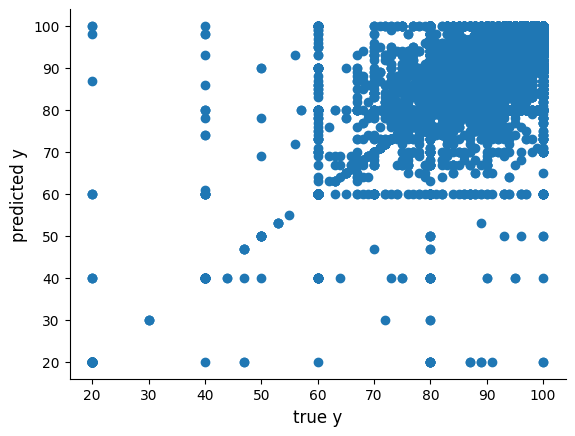

In [32]:
plt.scatter(y_test,y_pred)
plt.xlabel('true y')
plt.ylabel('predicted y')

In [33]:
#Hyperparameter tuning - GridSearch
parameters = {'criterion':['gini','entropy'],
              'max_depth':np.arange(1,21).tolist()[0::2],
              'min_samples_split':np.arange(2,11).tolist()[0::2],
              'max_leaf_nodes':np.arange(3,26).tolist()[0::2]}

In [34]:
g1 = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_jobs=-1)

In [35]:
start_time = time.time()
g1.fit(X_train,y_train)
duration = time.time() - start_time

/home/avt/miniconda3/envs/daaEnv/lib/python3.10/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [36]:
cls_params1 = g1.best_params_
cls_params1

{'criterion': 'gini',
 'max_depth': 5,
 'max_leaf_nodes': 25,
 'min_samples_split': 2}

In [37]:
model = g1.best_estimator_
y_pred = model.predict(X_test)
print('accuracy score: %.2f' % accuracy_score(y_test,y_pred))
print('precision score: %.2f' % precision_score(y_test,y_pred, average='micro'))
print('recall score: %.2f' % recall_score(y_test,y_pred, average='micro'))
print('f1 score: %.2f' % f1_score(y_test,y_pred, average='micro'))
print('computation time: %.2f' % duration)

accuracy score: 0.25
precision score: 0.25
recall score: 0.25
f1 score: 0.25
computation time: 453.86


In [38]:
#Hyperparameter tuning - Randomised Search

In [39]:
parameters = {'criterion':['gini','entropy'],
              'max_depth':poisson(mu=2,loc=2),
              'min_samples_split':uniform(),
              'max_leaf_nodes':poisson(mu=4,loc=3)}

In [40]:
r1 = RandomizedSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_iter=100, random_state=42, n_jobs=-1)

In [41]:
start_time = time.time()
r1.fit(X_train,y_train)
duration = time.time() - start_time

/home/avt/miniconda3/envs/daaEnv/lib/python3.10/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [42]:
cls_params2 = r1.best_params_
cls_params2['min_samples_split'] = np.ceil(cls_params2['min_samples_split']*X_train.shape[0])
cls_params2

{'criterion': 'gini',
 'max_depth': 4,
 'max_leaf_nodes': 11,
 'min_samples_split': 863.0}

In [45]:
model = r1.best_estimator_
y_pred = model.predict(X_test)
print('accuracy score: %.2f' % accuracy_score(y_test,y_pred))
print('precision score: %.2f' % precision_score(y_test,y_pred, average='micro'))
print('recall score: %.2f' % recall_score(y_test,y_pred, average='micro'))
print('f1 score: %.2f' % f1_score(y_test,y_pred, average='micro'))
print('computation time: %.2f' % duration)

accuracy score: 0.25
precision score: 0.25
recall score: 0.25
f1 score: 0.25
computation time: 25.09
